### can run this one by one interactively or, as a batch, run `../scripts/general_postproc.py`

In [1]:
import sys
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
sys.path.insert(0,'../scripts/')
from postprocessing import setup_postproc, check_pdc, plot_phi, get_obs_and_noise, get_pars, plot_group, plot_pars_group

/Users/mnfienen/Documents/GIT/hytest/NHM_CAL/nhm_pestpp/notebooks/../dependencies/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


In [2]:
# curr_model = '01473000'
curr_model = '05431486'
# curr_model = '09112500'
curr_run_root = 'ies_hot'
# curr_run_root = 'prior_mc_reweight'
eval_pdc = False
unzip_dirs = True
phi_cutoffs = {cm:{crr:9e99 for crr in ['ies_hot','prior_mc_reweight']}
                for cm in ['01473000','05431486', '09112500']}
pstdir, results_file, tmp_res_path, fig_dir, obs, pst = setup_postproc(curr_model, curr_run_root, unzip_dirs)

error parsing metadata from 'obsnme', continuing


### check out PDC

In [3]:
pst.nnz_obs_groups

['g_min_actet_mean_mon',
 'g_min_actet_mon',
 'g_min_recharge_ann',
 'g_min_runoff_mon',
 'g_min_sca_daily',
 'g_min_soil_moist_ann',
 'g_min_soil_moist_mon',
 'l_max_actet_mean_mon',
 'l_max_actet_mon',
 'l_max_recharge_ann',
 'l_max_runoff_mon',
 'l_max_sca_daily',
 'l_max_soil_moist_ann',
 'l_max_soil_moist_mon',
 'streamflow_daily_large_asc',
 'streamflow_daily_large_dsc',
 'streamflow_daily_small_asc',
 'streamflow_daily_small_dsc',
 'streamflow_daily_pulse_asc',
 'streamflow_daily_pulse_dsc',
 'streamflow_daily_low',
 'streamflow_daily_exlow',
 'streamflow_mean_mon',
 'streamflow_mon']

In [4]:
if eval_pdc:
    pdc = check_pdc(tmp_res_path, curr_run_root, pst, obs)
    print(pdc)

### look at PHI history

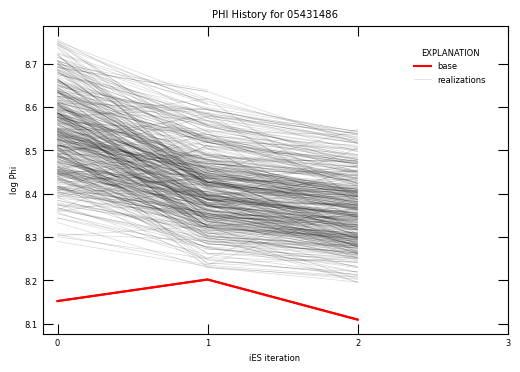

In [5]:
phi = plot_phi(tmp_res_path, curr_run_root, curr_model, fig_dir)

### Truncate PHI at a threshold

In [6]:
phi

,total_runs,mean,standard_deviation,min,max,0,1,2,3,4,...,433,434,435,436,437,438,439,440,441,base
iteration,,,,,,,,,,,,,,,,,,,,,
0,0,361504000.0,85663800.0,142065000.0,569768000.0,387829000.0,429565000.0,371521000.0,365486000.0,427847000.0,...,200920000.0,419044000.0,233112000.0,453278000.0,393805000.0,320614000.0,381336000.0,432585000.0,385324000.0,142065000.0
1,593,266014000.0,56343400.0,159312000.0,436181000.0,220549000.0,329607000.0,224225000.0,323889000.0,266346000.0,...,211702000.0,243619000.0,189449000.0,361892000.0,336830000.0,261014000.0,226018000.0,286888000.0,293619000.0,159312000.0
2,1170,234387000.0,44826000.0,128758000.0,353730000.0,182614000.0,294178000.0,220260000.0,288116000.0,230527000.0,...,159517000.0,216276000.0,169604000.0,281537000.0,NaN,213322000.0,219004000.0,257255000.0,250651000.0,128758000.0


In [7]:
best_iter = 2
if 'prior' in curr_run_root:
    best_iter = 0
best_iter

2

## now rejection sampling for outlier PHI values

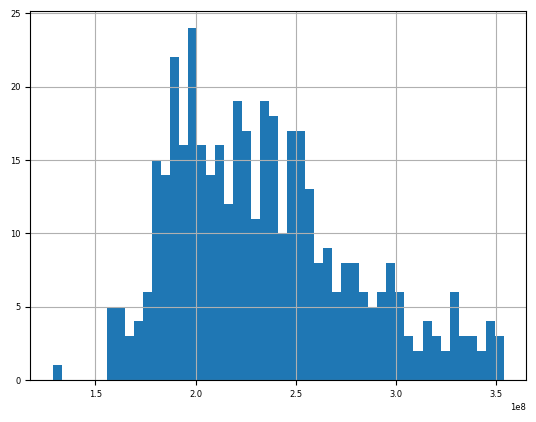

In [8]:
orgphi = phi.loc[best_iter].iloc[5:].copy()
ax = orgphi.hist(bins=50)
lims = ax.get_xlim()

In [9]:
# catalog of cutoffs heuristically determined
phi_cutoffs['01473000']['prior_mc_reweight'] = 4.0e7
phi_cutoffs['01473000']['ies_hot'] = 1.08e9
phi_cutoffs['05431486']['prior_mc_reweight'] = 5.7e8
phi_cutoffs['05431486']['ies_hot'] = 3.2e8
phi_cutoffs['09112500']['prior_mc_reweight'] = 1.2e9
phi_cutoffs['09112500']['ies_hot'] = 2.4e8

In [10]:
phi_too_high = phi_cutoffs[curr_model][curr_run_root]
phi_too_high

320000000.0

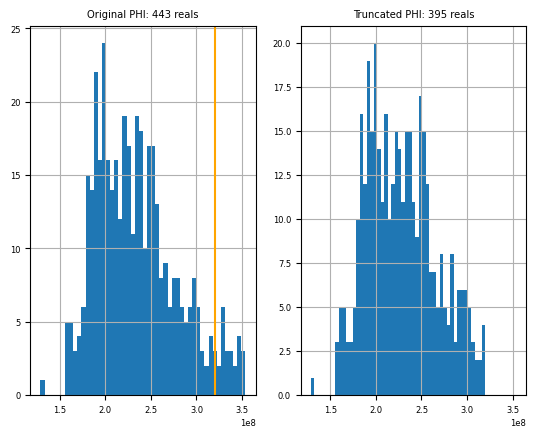

In [11]:
phi = orgphi.loc[orgphi<=phi_too_high]
fig,ax = plt.subplots(1,2)
### --> need to indicate which reals we will carry forward <-- ###
orgphi.hist(bins=50, ax=ax[0])
reals = phi.index 
phi.hist(bins=50, ax=ax[1])
ax[0].axvline(phi_too_high, color='orange')
ax[1].set_xlim(lims)
ax[0].set_title(f'Original PHI: {len(orgphi)} reals')
ax[1].set_title(f'Truncated PHI: {len(phi)} reals')
plt.savefig(fig_dir/ 'phi_histogram.pdf')


# How about parameters?

In [12]:
parens = get_pars(tmp_res_path, curr_run_root, reals, best_iter, pst)


In [13]:
pargps = parens['pargroup'].unique()
pargps


array(['adjmix_rain', 'carea_max', 'cecn_coef', 'emis_noppt',
       'fastcoef_lin', 'freeh2o_cap', 'gwflow_coef', 'jh_coef', 'mann_n',
       'potet_sublim', 'rad_trncf', 'radmax', 'rain_cbh_adj',
       'slowcoef_sq', 'smidx_coef', 'smidx_exp', 'snarea_thresh',
       'snow_cbh_adj', 'snowinfil_max', 'soil2gw_max', 'soil_moist_max',
       'soil_rechr_max_frac', 'ssr2gw_exp', 'ssr2gw_rate',
       'tmax_allrain_offset', 'tmax_allsnow', 'tmax_cbh_adj',
       'tmin_cbh_adj'], dtype=object)

evaluating parameter group: adjmix_rain
plotting parameter group: adjmix_rain
evaluating parameter group: carea_max
plotting parameter group: carea_max


AttributeError: 'NoneType' object has no attribute 'savefig'

<Figure size 640x480 with 0 Axes>

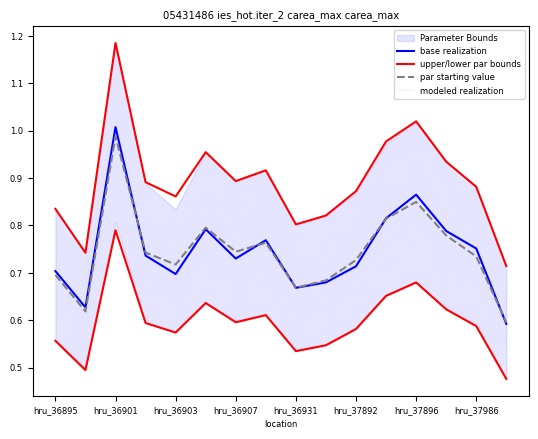

In [14]:
for cg in pargps:
    plot_pars_group(parens, cg, fig_dir, curr_model, best_iter, curr_run_root)

# Now let's start looking at the fits

In [15]:
modens, obens_noise = get_obs_and_noise(tmp_res_path, curr_run_root, reals, best_iter)

In [16]:
tmp_res_path

PosixPath('../results/05431486.ies_hot')

In [17]:
modens

,g_min_actet_mean_mon:10:36895,g_min_actet_mean_mon:10:36899,g_min_actet_mean_mon:10:36901,g_min_actet_mean_mon:10:36902,g_min_actet_mean_mon:10:36903,g_min_actet_mean_mon:10:36906,g_min_actet_mean_mon:10:36907,g_min_actet_mean_mon:10:36917,g_min_actet_mean_mon:10:36931,g_min_actet_mean_mon:10:36962,...,streamflow_mon:2015_8:05431017,streamflow_mon:2015_8:05431022,streamflow_mon:2015_8:05431032,streamflow_mon:2015_8:05431486,streamflow_mon:2015_9:054310157,streamflow_mon:2015_9:05431016,streamflow_mon:2015_9:05431017,streamflow_mon:2015_9:05431022,streamflow_mon:2015_9:05431032,streamflow_mon:2015_9:05431486
0,0.056896,0.059470,0.020413,0.041540,0.050887,0.062960,0.060577,0.050576,0.047310,0.053983,...,115.1390,179.5460,9.90631,9.11168,63.0514,120.2970,62.2091,84.6425,9.69551,8.95211
1,0.065322,0.046052,0.026848,0.058760,0.061236,0.064805,0.058278,0.036984,0.065142,0.074305,...,126.1880,211.9370,5.18830,10.92390,75.3268,86.2702,67.0154,98.9951,5.09962,10.75340
2,0.058750,0.048107,0.020594,0.051185,0.053124,0.069442,0.050880,0.058764,0.067906,0.075918,...,100.7810,110.7750,8.41471,7.11288,66.7689,157.3190,54.2713,65.7376,8.26305,7.00439
3,0.052778,0.059652,0.023653,0.051430,0.048676,0.065468,0.050878,0.061336,0.068598,0.062002,...,95.8126,134.0010,6.45508,7.98747,51.7253,132.8530,64.0144,107.5100,6.34562,7.85673
4,0.076111,0.066177,0.041394,0.047981,0.050120,0.053715,0.058165,0.046416,0.071525,0.056772,...,141.5450,138.3090,5.29603,7.69998,79.5997,78.3631,53.1769,67.7227,5.19979,7.56587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.058389,0.050884,0.039595,0.046181,0.058237,0.044378,0.051962,0.057711,0.071726,0.059188,...,147.9020,150.8900,9.79517,8.90649,85.3250,136.9040,51.8143,79.0422,9.61261,8.74601
441,0.049668,0.045009,0.024631,0.045472,0.063967,0.054000,0.053158,0.057377,0.057490,0.059988,...,77.2490,165.6560,9.13351,10.96270,47.6356,92.1643,61.0070,109.9560,8.84625,10.80140
base,0.056858,0.057369,0.026795,0.048942,0.055852,0.057039,0.056100,0.056061,0.064406,0.059799,...,121.5420,175.8390,4.08727,7.66957,71.6626,107.0660,58.2842,88.5648,4.01957,7.54146
mod_min,0.032196,0.035291,0.013225,0.028855,0.034073,0.029271,0.033780,0.036984,0.040466,0.039127,...,77.2490,59.7126,2.93970,5.95205,47.6356,64.6730,33.6921,29.9048,2.82031,5.85385


In [19]:
c = modens.columns
c

Index(['g_min_actet_mean_mon:10:36895', 'g_min_actet_mean_mon:10:36899',
       'g_min_actet_mean_mon:10:36901', 'g_min_actet_mean_mon:10:36902',
       'g_min_actet_mean_mon:10:36903', 'g_min_actet_mean_mon:10:36906',
       'g_min_actet_mean_mon:10:36907', 'g_min_actet_mean_mon:10:36917',
       'g_min_actet_mean_mon:10:36931', 'g_min_actet_mean_mon:10:36962',
       ...
       'streamflow_mon:2015_8:05431017', 'streamflow_mon:2015_8:05431022',
       'streamflow_mon:2015_8:05431032', 'streamflow_mon:2015_8:05431486',
       'streamflow_mon:2015_9:054310157', 'streamflow_mon:2015_9:05431016',
       'streamflow_mon:2015_9:05431017', 'streamflow_mon:2015_9:05431022',
       'streamflow_mon:2015_9:05431032', 'streamflow_mon:2015_9:05431486'],
      dtype='object', length=157584)

In [20]:
with open('tmp.dat','w') as ofp:
    [ofp.write(i+'\n') for i in c]

In [ ]:
import numpy as np
modens.quantile([0.05,0.95])

In [18]:
obens_noise

,g_min_actet_mean_mon:10:36895,g_min_actet_mean_mon:10:36899,g_min_actet_mean_mon:10:36901,g_min_actet_mean_mon:10:36902,g_min_actet_mean_mon:10:36903,g_min_actet_mean_mon:10:36906,g_min_actet_mean_mon:10:36907,g_min_actet_mean_mon:10:36917,g_min_actet_mean_mon:10:36931,g_min_actet_mean_mon:10:36962,...,streamflow_mon:2015_8:05431017,streamflow_mon:2015_8:05431022,streamflow_mon:2015_8:05431032,streamflow_mon:2015_8:05431486,streamflow_mon:2015_9:054310157,streamflow_mon:2015_9:05431016,streamflow_mon:2015_9:05431017,streamflow_mon:2015_9:05431022,streamflow_mon:2015_9:05431032,streamflow_mon:2015_9:05431486
0,0.029133,0.027552,0.025056,0.024778,0.024384,0.023406,0.027321,0.024526,0.021620,0.024873,...,2.18449,0.0,0.0,63.5862,0.0,21.1341,30.8677,0.0,0.0,184.037
1,0.029141,0.027488,0.025053,0.024751,0.024361,0.023436,0.027263,0.024517,0.021608,0.024918,...,2.46503,0.0,0.0,61.1256,0.0,19.4524,36.4068,0.0,0.0,151.676
2,0.029177,0.027501,0.025045,0.024778,0.024334,0.023456,0.027331,0.024557,0.021621,0.024874,...,2.12942,0.0,0.0,86.4549,0.0,19.5869,32.3523,0.0,0.0,165.797
3,0.029115,0.027491,0.025018,0.024733,0.024393,0.023404,0.027308,0.024536,0.021620,0.024877,...,2.42923,0.0,0.0,88.7447,0.0,25.9956,30.5405,0.0,0.0,169.453
4,0.029093,0.027544,0.025027,0.024749,0.024369,0.023393,0.027269,0.024559,0.021631,0.024877,...,2.36924,0.0,0.0,72.6108,0.0,24.5467,39.0855,0.0,0.0,159.879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.029147,0.027489,0.025079,0.024783,0.024376,0.023397,0.027324,0.024525,0.021620,0.024916,...,2.51769,0.0,0.0,73.3705,0.0,18.0351,36.6930,0.0,0.0,161.667
441,0.029082,0.027561,0.025073,0.024814,0.024373,0.023415,0.027327,0.024498,0.021619,0.024883,...,2.19845,0.0,0.0,61.5573,0.0,20.3520,33.8201,0.0,0.0,149.485
base,0.029127,0.027509,0.025045,0.024773,0.024373,0.023418,0.027318,0.024536,0.021618,0.024882,...,2.31290,0.0,0.0,74.2194,0.0,23.0430,32.2950,0.0,0.0,157.193
obs_min,0.029042,0.027426,0.024979,0.024704,0.024288,0.023357,0.027234,0.024464,0.021544,0.024793,...,1.55003,0.0,0.0,51.9444,0.0,16.0405,23.8398,0.0,0.0,111.239


In [ ]:
pst.obs_groups

In [ ]:
# plot_group('sca_daily', obs, modens, obens_noise, fig_dir, curr_model)

In [ ]:
plot_group('actet_mean_mon', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
plot_group('actet_mon', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
plot_group('runoff_mon', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
plot_group('soil_moist_mon', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
plot_group('recharge_ann', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)

# streamflow_daily is a special case - all aggregated
plot_group('streamflow_daily', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
plot_group('streamflow_mean_mon', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
plot_group('streamflow_mon', obs, modens, obens_noise, fig_dir, curr_model, best_iter, curr_run_root)
